<a href="https://colab.research.google.com/github/victormales/datasciencecoursera/blob/master/modelos_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conexión ambiente cuda

In [1]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

--2022-06-09 13:17:21--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.20.126
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb [following]
--2022-06-09 13:17:22--  https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?9OqV5jlovssgcu3h1FPRnLO3MB3OaJJfs18uLq9ebKSxWWLXofRuIrlZjRBletgKsOtLA_EntZP591tKqQqI779ymf-ve

In [2]:
!ls  # Check if required cuda 9.0 amd64-deb file is downloaded

cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb    drive
cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb.1  sample_data


In [3]:
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

(Reading database ... 164944 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1704-9-0-local (9.0.176-1) over (9.0.176-1) ...
Setting up cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...


In [4]:
!ls /var/cuda-repo-9-0-local | grep .pub

7fa2af80.pub


In [5]:
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub

OK


In [6]:
!apt-get update

Get:1 file:/var/cuda-repo-9-0-local  InRelease
Ign:1 file:/var/cuda-repo-9-0-local  InRelease
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:14 https://developer.download.nvidia.com/co

In [7]:
!sudo apt-get install cuda-9.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'cuda-9-0' for regex 'cuda-9.0'
Note, selecting 'libcuda-9.0-1' for regex 'cuda-9.0'
cuda-9-0 is already the newest version (9.0.176-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.


In [8]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [9]:
!pip install thundersvm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importar uso de paquetes

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

# Carga de datos

In [ ]:
datos_total = pd.read_csv('/content/drive/MyDrive/Tesis/data_total_modelos.csv')

In [ ]:
list(datos_total.columns)

['Unnamed: 0',
 'factaprobacionesnegaciones_numvalormonto_sum',
 'factasociatividadsipas_numvalorcuota_sum',
 'factasociatividadsipas_numvalorproteccioninicialsolicitado_sum',
 'factestadotac_numcupoasignadotac_sum',
 'factestadotac_numcupoutilizadotac_sum',
 'factestadotac_numtarjetasutilizadotac_sum',
 'factindicadorescuotacerouno_count_1196.0_sum',
 'factindicadorescuotacerouno_count_1197.0_sum',
 'factindicadorescuotacerouno_count_272.0_sum',
 'factindicadorescuotacerouno_count_91.0_sum',
 'facttenenciacredisolidario_numcantidadcuotasmora_sum',
 'facttenenciacredisolidario_numvalorcuota_sum',
 'facttenenciacredisolidario_numvalorsaldoactual_sum',
 'facttenenciacredisolidario_numvalorsaldomora_sum',
 'facttenenciacredisolidario_numvalortasaefectivaanual_sum',
 'facttenenciaeducacionfundacion_numvalorcuota_sum',
 'facttenenciamicrocreditos_count_al_dia_sum',
 'facttenenciamicrocreditos_count_en_mora_sum',
 'facttenenciamicrocreditos_numvalorcuota_sum',
 'facttenenciamicrocreditos_num

In [ ]:
variables_modelo_total = ["aprobacionesnegacionesPendiente",
"factasociatividadsipas_numvalorcuota_sum",
"factasociatividadsipas_numvalorproteccioninicialsolicitado_sum",
"facttenenciacredisolidario_numvalorcuota_sum",
"sieeducacionterminado",
"suecoeducCancelado",
"siefundacionterminado",
"facttenenciaeducacionfundacion_numvalorcuota_sum",
"bancasegurosCancelado",
"otras_polizasCancelado",
"soatCancelado",
"facttenenciarecreacionturismo_count_convenios-activo_sum",
"facttenenciarecreacionturismo_count_eventos-activo_sum",
"facttenenciarecreacionturismo_numvalorcuota_sum",
"fuga",
"ingresos_num_valor_ingresos",
"nkCliente",
"numedad",
"segmentos_count_consolidacion_sum",
"segmentos_count_en_formacion_sum",
"segmentos_count_joven_asociado_sum",
"segmentos_count_maduro_sum",
"segmentos_count_mujer_independiente_sum",
"segmentos_count_sin_segmento_sum",
"segmentos_count_transicion_sum",
"segmentos_num_cantidad_productos_sum",
"strdesccodunicocorte_al_05_del_mes",
"strdesccodunicocorte_al_10_del_mes",
"strdesccodunicocorte_al_15_del_mes",
"strdesccodunicocorte_al_20_del_mes",
"strdesccodunicocorte_al_25_del_mes",
"strdesccodunicocorte_al_30_del_mes",
"strdesccodunicocorte_campo_nulo",
"strdescripcion_skactividadlaboral_ama_de_casa",
"strdescripcion_skactividadlaboral_asalariado",
"strdescripcion_skactividadlaboral_estudiante",
"strdescripcion_skactividadlaboral_independiente",
"strdescripcion_skactividadlaboral_ninguno_/_no_definido",
"strdescripcion_skactividadlaboral_no_cruza",
"strdescripcion_skactividadlaboral_otro_tipo_de_actividad",
"strdescripcion_skactividadlaboral_pensionado_-_jubilado",
"strdescripcion_skactividadlaboral_rentista_capital",
"strdescripcion_skactividadlaboral_socio_sociedad",
"strdescripcion_skareaconocimiento_agronomia,_veterinaria_y_afines",
"strdescripcion_skareaconocimiento_bellas_artes",
"strdescripcion_skareaconocimiento_ciencias_de_la_educacion",
"strdescripcion_skareaconocimiento_ciencias_de_la_salud",
'strdescripcion_skareaconocimiento_ciencias_sociales,_derecho_y_ciencia_politica',
'strdescripcion_skareaconocimiento_economia,_administracion,_contaduria_y_afines',
"strdescripcion_skareaconocimiento_humanidades_y_ciencias_religiosas",
"strdescripcion_skareaconocimiento_ingenieria,_arquitectura,_urbanismo_y_afines",
"strdescripcion_skareaconocimiento_matematicas_y_ciencias_naturales",
"strdescripcion_skareaconocimiento_no_cruza",
"strdescripcion_skestadocivil_casado",
"strdescripcion_skestadocivil_divorciado",
"strdescripcion_skestadocivil_no_cruza",
"strdescripcion_skestadocivil_no_definido",
"strdescripcion_skestadocivil_separado",
"strdescripcion_skestadocivil_soltero",
"strdescripcion_skestadocivil_union_libre",
"strdescripcion_skestadocivil_viudo",
"strdescripcion_skestrato_alto",
"strdescripcion_skestrato_bajo",
"strdescripcion_skestrato_bajo-bajo",
"strdescripcion_skestrato_medio",
"strdescripcion_skestrato_medio-alto",
"strdescripcion_skestrato_medio-bajo",
"strdescripcion_skestrato_no_cruza",
"strdescripcion_skestrato_no_definido",
"strdescripcion_sknivelacademico_especializacion",
"strdescripcion_sknivelacademico_ninguno",
"strdescripcion_sknivelacademico_no_cruza",
"strdescripcion_sknivelacademico_otros",
"strdescripcion_sknivelacademico_primaria",
"strdescripcion_sknivelacademico_profesional",
"strdescripcion_sknivelacademico_tecnico",
"strdescripcion_sknivelacademico_tecnologo",
"strdescripcion_sktipovivienda_alquiler",
"strdescripcion_sktipovivienda_desconocida",
"strdescripcion_sktipovivienda_familiar",
"strdescripcion_sktipovivienda_no_cruza",
"strdescripcion_sktipovivienda_propia",
"tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum",
"tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum",
"tmpproductosbancohistoricotenencia_count_banco_sta_cof0421116_cupo_sum",
]

In [ ]:
data_modelo_pura = datos_total.loc[:,datos_total.columns.isin(variables_modelo_total)]

In [ ]:
data_modelo_pura.rename(columns = {'fuga' : 'label'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Conteos de variables respuesta

In [ ]:
data_modelo_pura['label'].value_counts()

1    226446
0    185154
Name: label, dtype: int64

In [ ]:
data_modelo_pura.shape

(411600, 84)

# Data Cleaning

In [ ]:
variables_demo = ["nkCliente",
#"numcodtipovinculacion",
"ingresos_num_valor_ingresos",
"numedad",
"segmentos_count_consolidacion_sum",
"segmentos_count_en_formacion_sum",
"segmentos_count_joven_asociado_sum",
"segmentos_count_maduro_sum",
"segmentos_count_mujer_independiente_sum",
"segmentos_count_sin_segmento_sum",
"segmentos_count_transicion_sum",
"segmentos_num_cantidad_productos_sum",
"strdesccodunicocorte_al_05_del_mes",
"strdesccodunicocorte_al_10_del_mes",
"strdesccodunicocorte_al_15_del_mes",
"strdesccodunicocorte_al_20_del_mes",
"strdesccodunicocorte_al_25_del_mes",
"strdesccodunicocorte_al_30_del_mes",
"strdesccodunicocorte_campo_nulo",
"strdescripcion_skactividadlaboral_ama_de_casa",
"strdescripcion_skactividadlaboral_asalariado",
"strdescripcion_skactividadlaboral_estudiante",
"strdescripcion_skactividadlaboral_independiente",
"strdescripcion_skactividadlaboral_ninguno_/_no_definido",
"strdescripcion_skactividadlaboral_no_cruza",
"strdescripcion_skactividadlaboral_otro_tipo_de_actividad",
"strdescripcion_skactividadlaboral_pensionado_-_jubilado",
"strdescripcion_skactividadlaboral_rentista_capital",
"strdescripcion_skactividadlaboral_socio_sociedad",
"strdescripcion_skareaconocimiento_agronomia,_veterinaria_y_afines",
"strdescripcion_skareaconocimiento_bellas_artes",
"strdescripcion_skareaconocimiento_ciencias_de_la_educacion",
"strdescripcion_skareaconocimiento_ciencias_de_la_salud",
'strdescripcion_skareaconocimiento_ciencias_sociales,_derecho_y_ciencia_politica',
'strdescripcion_skareaconocimiento_economia,_administracion,_contaduria_y_afines',
"strdescripcion_skareaconocimiento_humanidades_y_ciencias_religiosas",
"strdescripcion_skareaconocimiento_ingenieria,_arquitectura,_urbanismo_y_afines",
"strdescripcion_skareaconocimiento_matematicas_y_ciencias_naturales",
"strdescripcion_skareaconocimiento_no_cruza",
"strdescripcion_skestadocivil_casado",
"strdescripcion_skestadocivil_divorciado",
"strdescripcion_skestadocivil_no_cruza",
"strdescripcion_skestadocivil_no_definido",
"strdescripcion_skestadocivil_separado",
"strdescripcion_skestadocivil_soltero",
"strdescripcion_skestadocivil_union_libre",
"strdescripcion_skestadocivil_viudo",
"strdescripcion_skestrato_alto",
"strdescripcion_skestrato_bajo",
"strdescripcion_skestrato_bajo-bajo",
"strdescripcion_skestrato_medio",
"strdescripcion_skestrato_medio-alto",
"strdescripcion_skestrato_medio-bajo",
"strdescripcion_skestrato_no_cruza",
"strdescripcion_skestrato_no_definido",
"strdescripcion_sknivelacademico_especializacion",
"strdescripcion_sknivelacademico_ninguno",
"strdescripcion_sknivelacademico_no_cruza",
"strdescripcion_sknivelacademico_otros",
"strdescripcion_sknivelacademico_primaria",
"strdescripcion_sknivelacademico_profesional",
"strdescripcion_sknivelacademico_tecnico",
"strdescripcion_sknivelacademico_tecnologo",
"strdescripcion_sktipovivienda_alquiler",
"strdescripcion_sktipovivienda_desconocida",
"strdescripcion_sktipovivienda_familiar",
"strdescripcion_sktipovivienda_no_cruza",
"strdescripcion_sktipovivienda_propia"]




In [ ]:
data_demo = data_modelo_pura.loc[:,data_modelo_pura.columns.isin(variables_demo)]

In [ ]:
data_demo.head()

,ingresos_num_valor_ingresos,nkCliente,numedad,segmentos_count_consolidacion_sum,segmentos_count_en_formacion_sum,segmentos_count_joven_asociado_sum,segmentos_count_maduro_sum,segmentos_count_mujer_independiente_sum,segmentos_count_sin_segmento_sum,segmentos_count_transicion_sum,...,strdescripcion_sknivelacademico_otros,strdescripcion_sknivelacademico_primaria,strdescripcion_sknivelacademico_profesional,strdescripcion_sknivelacademico_tecnico,strdescripcion_sknivelacademico_tecnologo,strdescripcion_sktipovivienda_alquiler,strdescripcion_sktipovivienda_desconocida,strdescripcion_sktipovivienda_familiar,strdescripcion_sktipovivienda_no_cruza,strdescripcion_sktipovivienda_propia
0,7398084.0,CC40041526,45.0,84.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,1,0,0,1,0,0,0.0,0
1,1112461.0,CC40041883,43.0,0.0,0.0,0.0,0.0,3.0,8.0,22.0,...,0.0,0.0,1,0,0,0,0,1,0.0,0
2,2175384.0,CC40043537,43.0,84.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,1,0,0,0,0,1,0.0,0
3,8894760.0,CC40046612,41.0,0.0,0.0,0.0,0.0,80.0,8.0,4.0,...,0.0,0.0,0,0,1,0,0,1,0.0,0
4,0.0,CC40048857,39.0,0.0,0.0,0.0,0.0,80.0,8.0,0.0,...,0.0,0.0,1,0,0,0,0,1,0.0,0


In [ ]:
data_demo['segmento_ciclo_vida'] = (data_demo[["segmentos_count_consolidacion_sum","segmentos_count_en_formacion_sum","segmentos_count_joven_asociado_sum","segmentos_count_maduro_sum","segmentos_count_mujer_independiente_sum","segmentos_count_sin_segmento_sum","segmentos_count_transicion_sum"]] == 1).idxmax(1)
data_demo['unicocorte'] = (data_demo[['strdesccodunicocorte_al_05_del_mes','strdesccodunicocorte_al_10_del_mes','strdesccodunicocorte_al_15_del_mes','strdesccodunicocorte_al_20_del_mes','strdesccodunicocorte_al_25_del_mes','strdesccodunicocorte_al_30_del_mes']] == 1).idxmax(1)
data_demo['actividad_laboral'] = (data_demo[['strdescripcion_skactividadlaboral_ama_de_casa','strdescripcion_skactividadlaboral_asalariado','strdescripcion_skactividadlaboral_estudiante','strdescripcion_skactividadlaboral_independiente','strdescripcion_skactividadlaboral_ninguno_/_no_definido','strdescripcion_skactividadlaboral_no_cruza','strdescripcion_skactividadlaboral_otro_tipo_de_actividad','strdescripcion_skactividadlaboral_pensionado_-_jubilado','strdescripcion_skactividadlaboral_rentista_capital','strdescripcion_skactividadlaboral_socio_sociedad']] == 1).idxmax(1)
data_demo['area_conocimientos'] = (data_demo[['strdescripcion_skareaconocimiento_agronomia,_veterinaria_y_afines','strdescripcion_skareaconocimiento_bellas_artes','strdescripcion_skareaconocimiento_ciencias_de_la_educacion','strdescripcion_skareaconocimiento_ciencias_de_la_salud','strdescripcion_skareaconocimiento_ciencias_sociales,_derecho_y_ciencia_politica','strdescripcion_skareaconocimiento_economia,_administracion,_contaduria_y_afines','strdescripcion_skareaconocimiento_humanidades_y_ciencias_religiosas','strdescripcion_skareaconocimiento_ingenieria,_arquitectura,_urbanismo_y_afines','strdescripcion_skareaconocimiento_matematicas_y_ciencias_naturales','strdescripcion_skareaconocimiento_no_cruza']] == 1).idxmax(1)
data_demo['estado_civil'] = (data_demo[['strdescripcion_skestadocivil_casado','strdescripcion_skestadocivil_divorciado','strdescripcion_skestadocivil_no_cruza','strdescripcion_skestadocivil_no_definido','strdescripcion_skestadocivil_separado','strdescripcion_skestadocivil_soltero','strdescripcion_skestadocivil_union_libre','strdescripcion_skestadocivil_viudo']] == 1).idxmax(1)
data_demo['estrato'] = (data_demo[['strdescripcion_skestrato_alto','strdescripcion_skestrato_bajo','strdescripcion_skestrato_bajo-bajo','strdescripcion_skestrato_medio','strdescripcion_skestrato_medio-alto','strdescripcion_skestrato_medio-bajo','strdescripcion_skestrato_no_cruza','strdescripcion_skestrato_no_definido']] == 1).idxmax(1)
data_demo['nivel_academico'] = (data_demo[['strdescripcion_sknivelacademico_especializacion','strdescripcion_sknivelacademico_ninguno','strdescripcion_sknivelacademico_no_cruza','strdescripcion_sknivelacademico_otros','strdescripcion_sknivelacademico_primaria','strdescripcion_sknivelacademico_profesional','strdescripcion_sknivelacademico_tecnico','strdescripcion_sknivelacademico_tecnologo']] == 1).idxmax(1)
data_demo['tipo_vivienda'] = (data_demo[['strdescripcion_sktipovivienda_alquiler','strdescripcion_sktipovivienda_desconocida','strdescripcion_sktipovivienda_familiar','strdescripcion_sktipovivienda_no_cruza','strdescripcion_sktipovivienda_propia']] == 1).idxmax(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
var_remove_demo = ["segmentos_count_consolidacion_sum",
"segmentos_count_en_formacion_sum",
"segmentos_count_joven_asociado_sum",
"segmentos_count_maduro_sum",
"segmentos_count_mujer_independiente_sum",
"segmentos_count_sin_segmento_sum",
"segmentos_count_transicion_sum",
"strdesccodunicocorte_al_05_del_mes",
"strdesccodunicocorte_al_10_del_mes",
"strdesccodunicocorte_al_15_del_mes",
"strdesccodunicocorte_al_20_del_mes",
"strdesccodunicocorte_al_25_del_mes",
"strdesccodunicocorte_al_30_del_mes",
"strdescripcion_skactividadlaboral_ama_de_casa",
"strdescripcion_skactividadlaboral_asalariado",
"strdescripcion_skactividadlaboral_estudiante",
"strdescripcion_skactividadlaboral_independiente",
"strdescripcion_skactividadlaboral_ninguno_/_no_definido",
"strdescripcion_skactividadlaboral_no_cruza",
"strdescripcion_skactividadlaboral_otro_tipo_de_actividad",
"strdescripcion_skactividadlaboral_pensionado_-_jubilado",
"strdescripcion_skactividadlaboral_rentista_capital",
"strdescripcion_skactividadlaboral_socio_sociedad",
"strdescripcion_skareaconocimiento_agronomia,_veterinaria_y_afines",
"strdescripcion_skareaconocimiento_bellas_artes",
"strdescripcion_skareaconocimiento_ciencias_de_la_educacion",
"strdescripcion_skareaconocimiento_ciencias_de_la_salud",
'strdescripcion_skareaconocimiento_ciencias_sociales,_derecho_y_ciencia_politica',
'strdescripcion_skareaconocimiento_economia,_administracion,_contaduria_y_afines',
"strdescripcion_skareaconocimiento_humanidades_y_ciencias_religiosas",
"strdescripcion_skareaconocimiento_ingenieria,_arquitectura,_urbanismo_y_afines",
"strdescripcion_skareaconocimiento_matematicas_y_ciencias_naturales",
"strdescripcion_skareaconocimiento_no_cruza",
"strdescripcion_skestadocivil_casado",
"strdescripcion_skestadocivil_divorciado",
"strdescripcion_skestadocivil_no_cruza",
"strdescripcion_skestadocivil_no_definido",
"strdescripcion_skestadocivil_separado",
"strdescripcion_skestadocivil_soltero",
"strdescripcion_skestadocivil_union_libre",
"strdescripcion_skestadocivil_viudo",
"strdescripcion_skestrato_alto",
"strdescripcion_skestrato_bajo",
"strdescripcion_skestrato_bajo-bajo",
"strdescripcion_skestrato_medio",
"strdescripcion_skestrato_medio-alto",
"strdescripcion_skestrato_medio-bajo",
"strdescripcion_skestrato_no_cruza",
"strdescripcion_skestrato_no_definido",
"strdescripcion_sknivelacademico_especializacion",
"strdescripcion_sknivelacademico_ninguno",
"strdescripcion_sknivelacademico_no_cruza",
"strdescripcion_sknivelacademico_otros",
"strdescripcion_sknivelacademico_primaria",
"strdescripcion_sknivelacademico_profesional",
"strdescripcion_sknivelacademico_tecnico",
"strdescripcion_sknivelacademico_tecnologo",
"strdescripcion_sktipovivienda_alquiler",
"strdescripcion_sktipovivienda_desconocida",
"strdescripcion_sktipovivienda_familiar",
"strdescripcion_sktipovivienda_no_cruza",
"strdescripcion_sktipovivienda_propia"]

In [ ]:
data_demografica_clean = data_demo.drop(var_remove_demo, axis = 1)

In [ ]:
data_demografica_clean.head()

,ingresos_num_valor_ingresos,nkCliente,numedad,segmentos_num_cantidad_productos_sum,segmento_ciclo_vida,unicocorte,actividad_laboral,area_conocimientos,estado_civil,estrato,nivel_academico,tipo_vivienda
0,7398084.0,CC40041526,45.0,619.0,segmentos_count_consolidacion_sum,strdesccodunicocorte_al_25_del_mes,strdescripcion_skactividadlaboral_independiente,"strdescripcion_skareaconocimiento_economia,_ad...",strdescripcion_skestadocivil_soltero,strdescripcion_skestrato_medio-bajo,strdescripcion_sknivelacademico_profesional,strdescripcion_sktipovivienda_alquiler
1,1112461.0,CC40041883,43.0,36.0,segmentos_count_consolidacion_sum,strdesccodunicocorte_al_30_del_mes,strdescripcion_skactividadlaboral_asalariado,strdescripcion_skareaconocimiento_ciencias_soc...,strdescripcion_skestadocivil_casado,strdescripcion_skestrato_medio-bajo,strdescripcion_sknivelacademico_profesional,strdescripcion_sktipovivienda_familiar
2,2175384.0,CC40043537,43.0,689.0,segmentos_count_consolidacion_sum,strdesccodunicocorte_al_05_del_mes,strdescripcion_skactividadlaboral_asalariado,strdescripcion_skareaconocimiento_ciencias_de_...,strdescripcion_skestadocivil_casado,strdescripcion_skestrato_bajo,strdescripcion_sknivelacademico_profesional,strdescripcion_sktipovivienda_familiar
3,8894760.0,CC40046612,41.0,698.0,segmentos_count_consolidacion_sum,strdesccodunicocorte_al_05_del_mes,strdescripcion_skactividadlaboral_independiente,strdescripcion_skareaconocimiento_ciencias_de_...,strdescripcion_skestadocivil_soltero,strdescripcion_skestrato_medio-alto,strdescripcion_sknivelacademico_tecnologo,strdescripcion_sktipovivienda_familiar
4,0.0,CC40048857,39.0,237.0,segmentos_count_consolidacion_sum,strdesccodunicocorte_al_05_del_mes,strdescripcion_skactividadlaboral_independiente,"strdescripcion_skareaconocimiento_ingenieria,_...",strdescripcion_skestadocivil_soltero,strdescripcion_skestrato_medio,strdescripcion_sknivelacademico_profesional,strdescripcion_sktipovivienda_familiar


In [ ]:
data_demografica_clean.shape

(411600, 12)

In [ ]:
data_demografica_clean['segmento_ciclo_vida'] = data_demografica_clean['segmento_ciclo_vida'].str.replace('segmentos_count_','')
data_demografica_clean['segmento_ciclo_vida'] = data_demografica_clean['segmento_ciclo_vida'].str.replace('_sum','')
data_demografica_clean['unicocorte'] = data_demografica_clean['unicocorte'].str.replace('strdesccodunicocorte_al_','')
data_demografica_clean['actividad_laboral'] = data_demografica_clean['actividad_laboral'].str.replace('strdescripcion_skactividadlaboral_','')
data_demografica_clean['area_conocimientos'] = data_demografica_clean['area_conocimientos'].str.replace('strdescripcion_skareaconocimiento_','')
data_demografica_clean['estado_civil'] = data_demografica_clean['estado_civil'].str.replace('strdescripcion_skestadocivil_','')
data_demografica_clean['estrato'] = data_demografica_clean['estrato'].str.replace('strdescripcion_skestrato_','')
data_demografica_clean['nivel_academico'] = data_demografica_clean['nivel_academico'].str.replace('strdescripcion_sknivelacademico_','')
data_demografica_clean['tipo_vivienda'] = data_demografica_clean['tipo_vivienda'].str.replace('strdescripcion_sktipovivienda_','')



In [ ]:
data_demografica_clean.head()

,ingresos_num_valor_ingresos,nkCliente,numedad,segmentos_num_cantidad_productos_sum,segmento_ciclo_vida,unicocorte,actividad_laboral,area_conocimientos,estado_civil,estrato,nivel_academico,tipo_vivienda
0,7398084.0,CC40041526,45.0,619.0,consolidacion,25_del_mes,independiente,"economia,_administracion,_contaduria_y_afines",soltero,medio-bajo,profesional,alquiler
1,1112461.0,CC40041883,43.0,36.0,consolidacion,30_del_mes,asalariado,"ciencias_sociales,_derecho_y_ciencia_politica",casado,medio-bajo,profesional,familiar
2,2175384.0,CC40043537,43.0,689.0,consolidacion,05_del_mes,asalariado,ciencias_de_la_salud,casado,bajo,profesional,familiar
3,8894760.0,CC40046612,41.0,698.0,consolidacion,05_del_mes,independiente,ciencias_de_la_salud,soltero,medio-alto,tecnologo,familiar
4,0.0,CC40048857,39.0,237.0,consolidacion,05_del_mes,independiente,"ingenieria,_arquitectura,_urbanismo_y_afines",soltero,medio,profesional,familiar


In [ ]:
variables_transa = ["aprobacionesnegacionesPendiente",
"factasociatividadsipas_numvalorcuota_sum",
"factasociatividadsipas_numvalorproteccioninicialsolicitado_sum",
"facttenenciacredisolidario_numvalorcuota_sum",
"sieeducacionterminado",
"suecoeducCancelado",
"siefundacionterminado",
"facttenenciaeducacionfundacion_numvalorcuota_sum",
"bancasegurosCancelado",
"otras_polizasCancelado",
"soatCancelado",
"facttenenciarecreacionturismo_count_convenios-activo_sum",
"facttenenciarecreacionturismo_count_eventos-activo_sum",
"facttenenciarecreacionturismo_numvalorcuota_sum",
"tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum",
"tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum",
"tmpproductosbancohistoricotenencia_count_banco_sta_cof0421116_cupo_sum",
"label",
"nkCliente"]

In [ ]:
data_transacional= data_modelo_pura.loc[:,data_modelo_pura.columns.isin(variables_transa)]

In [ ]:
data_transacional.head()

,factasociatividadsipas_numvalorcuota_sum,factasociatividadsipas_numvalorproteccioninicialsolicitado_sum,facttenenciacredisolidario_numvalorcuota_sum,facttenenciaeducacionfundacion_numvalorcuota_sum,facttenenciarecreacionturismo_count_convenios-activo_sum,facttenenciarecreacionturismo_count_eventos-activo_sum,facttenenciarecreacionturismo_numvalorcuota_sum,label,nkCliente,tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof0421116_cupo_sum,aprobacionesnegacionesPendiente,bancasegurosCancelado,otras_polizasCancelado,sieeducacionterminado,siefundacionterminado,soatCancelado,suecoeducCancelado
0,445701.0,25800005.0,0.0,375000.0,26.0,62.0,5108000.0,0,CC40041526,0.0,0.0,0.0,0.0,4.0,3.0,37.0,0.0,0.0,56.0
1,893517.0,19800180.0,0.0,264000.0,21.0,0.0,1328000.0,0,CC40041883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,1348337.0,32732413.0,0.0,0.0,44.0,0.0,2268000.0,0,CC40043537,2.0,5.0,27.0,47.0,30.0,4.0,155.0,0.0,0.0,0.0
3,743030.0,120134700.0,0.0,247500.0,22.0,62.0,2218000.0,0,CC40046612,0.0,2.0,59.0,39.0,16.0,0.0,63.0,17.0,13.0,37.0
4,201738.0,11764800.0,0.0,0.0,26.0,54.0,224000.0,0,CC40048857,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0


In [ ]:
data_transacional.set_index('nkCliente', inplace=True)
data_demografica_clean.set_index('nkCliente', inplace=True)


In [ ]:
datos_modelos = pd.merge(data_transacional,data_demografica_clean, left_index=True, right_index=True)

In [ ]:
datos_modelos.shape

(411600, 29)

In [ ]:
datos_modelos.head()

,factasociatividadsipas_numvalorcuota_sum,factasociatividadsipas_numvalorproteccioninicialsolicitado_sum,facttenenciacredisolidario_numvalorcuota_sum,facttenenciaeducacionfundacion_numvalorcuota_sum,facttenenciarecreacionturismo_count_convenios-activo_sum,facttenenciarecreacionturismo_count_eventos-activo_sum,facttenenciarecreacionturismo_numvalorcuota_sum,label,tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum,...,numedad,segmentos_num_cantidad_productos_sum,segmento_ciclo_vida,unicocorte,actividad_laboral,area_conocimientos,estado_civil,estrato,nivel_academico,tipo_vivienda
nkCliente,,,,,,,,,,,,,,,,,,,,,
CC40041526,445701.0,25800005.0,0.0,375000.0,26.0,62.0,5108000.0,0,0.0,0.0,...,45.0,619.0,consolidacion,25_del_mes,independiente,"economia,_administracion,_contaduria_y_afines",soltero,medio-bajo,profesional,alquiler
CC40041883,893517.0,19800180.0,0.0,264000.0,21.0,0.0,1328000.0,0,0.0,0.0,...,43.0,36.0,consolidacion,30_del_mes,asalariado,"ciencias_sociales,_derecho_y_ciencia_politica",casado,medio-bajo,profesional,familiar
CC40043537,1348337.0,32732413.0,0.0,0.0,44.0,0.0,2268000.0,0,2.0,5.0,...,43.0,689.0,consolidacion,05_del_mes,asalariado,ciencias_de_la_salud,casado,bajo,profesional,familiar
CC40046612,743030.0,120134700.0,0.0,247500.0,22.0,62.0,2218000.0,0,0.0,2.0,...,41.0,698.0,consolidacion,05_del_mes,independiente,ciencias_de_la_salud,soltero,medio-alto,tecnologo,familiar
CC40048857,201738.0,11764800.0,0.0,0.0,26.0,54.0,224000.0,0,0.0,0.0,...,39.0,237.0,consolidacion,05_del_mes,independiente,"ingenieria,_arquitectura,_urbanismo_y_afines",soltero,medio,profesional,familiar


In [ ]:
datos_modelos.columns

Index(['factasociatividadsipas_numvalorcuota_sum',
       'factasociatividadsipas_numvalorproteccioninicialsolicitado_sum',
       'facttenenciacredisolidario_numvalorcuota_sum',
       'facttenenciaeducacionfundacion_numvalorcuota_sum',
       'facttenenciarecreacionturismo_count_convenios-activo_sum',
       'facttenenciarecreacionturismo_count_eventos-activo_sum',
       'facttenenciarecreacionturismo_numvalorcuota_sum', 'label',
       'tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum',
       'tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum',
       'tmpproductosbancohistoricotenencia_count_banco_sta_cof0421116_cupo_sum',
       'aprobacionesnegacionesPendiente', 'bancasegurosCancelado',
       'otras_polizasCancelado', 'sieeducacionterminado',
       'siefundacionterminado', 'soatCancelado', 'suecoeducCancelado',
       'ingresos_num_valor_ingresos', 'numedad',
       'segmentos_num_cantidad_productos_sum', 'segmento_ciclo_vida',
       'unicocorte

In [ ]:
variables_numericas= ['factasociatividadsipas_numvalorcuota_sum',
       'factasociatividadsipas_numvalorproteccioninicialsolicitado_sum',
       'facttenenciacredisolidario_numvalorcuota_sum',
       'facttenenciaeducacionfundacion_numvalorcuota_sum',
       'facttenenciarecreacionturismo_count_convenios-activo_sum',
       'facttenenciarecreacionturismo_count_eventos-activo_sum',
       'facttenenciarecreacionturismo_numvalorcuota_sum', 'label',
       'tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum',
       'tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum',
       'tmpproductosbancohistoricotenencia_count_banco_sta_cof0421116_cupo_sum',
       'aprobacionesnegacionesPendiente', 'bancasegurosCancelado',
       'otras_polizasCancelado', 'sieeducacionterminado',
       'siefundacionterminado', 'soatCancelado', 'suecoeducCancelado',
       'ingresos_num_valor_ingresos', 'numedad',
       'segmentos_num_cantidad_productos_sum']

In [ ]:
variables_categoricas = ['segmento_ciclo_vida',
       'unicocorte', 'actividad_laboral', 'area_conocimientos', 'estado_civil',
       'estrato', 'nivel_academico', 'tipo_vivienda']

In [ ]:
data_categorica = datos_modelos.loc[:,datos_modelos.columns.isin(variables_categoricas)]

In [ ]:
data_numerica = datos_modelos.loc[:,datos_modelos.columns.isin(variables_numericas)]

In [ ]:
data_numerica.shape

(411600, 21)

In [ ]:
data_numerica.head()

,factasociatividadsipas_numvalorcuota_sum,factasociatividadsipas_numvalorproteccioninicialsolicitado_sum,facttenenciacredisolidario_numvalorcuota_sum,facttenenciaeducacionfundacion_numvalorcuota_sum,facttenenciarecreacionturismo_count_convenios-activo_sum,facttenenciarecreacionturismo_count_eventos-activo_sum,facttenenciarecreacionturismo_numvalorcuota_sum,label,tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum,...,aprobacionesnegacionesPendiente,bancasegurosCancelado,otras_polizasCancelado,sieeducacionterminado,siefundacionterminado,soatCancelado,suecoeducCancelado,ingresos_num_valor_ingresos,numedad,segmentos_num_cantidad_productos_sum
nkCliente,,,,,,,,,,,,,,,,,,,,,
CC40041526,445701.0,25800005.0,0.0,375000.0,26.0,62.0,5108000.0,0,0.0,0.0,...,0.0,4.0,3.0,37.0,0.0,0.0,56.0,7398084.0,45.0,619.0
CC40041883,893517.0,19800180.0,0.0,264000.0,21.0,0.0,1328000.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,22.0,1112461.0,43.0,36.0
CC40043537,1348337.0,32732413.0,0.0,0.0,44.0,0.0,2268000.0,0,2.0,5.0,...,47.0,30.0,4.0,155.0,0.0,0.0,0.0,2175384.0,43.0,689.0
CC40046612,743030.0,120134700.0,0.0,247500.0,22.0,62.0,2218000.0,0,0.0,2.0,...,39.0,16.0,0.0,63.0,17.0,13.0,37.0,8894760.0,41.0,698.0
CC40048857,201738.0,11764800.0,0.0,0.0,26.0,54.0,224000.0,0,0.0,0.0,...,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,39.0,237.0


# EDA (Explory data Analisys)

In [ ]:

import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
corr = data_numerica.corr()

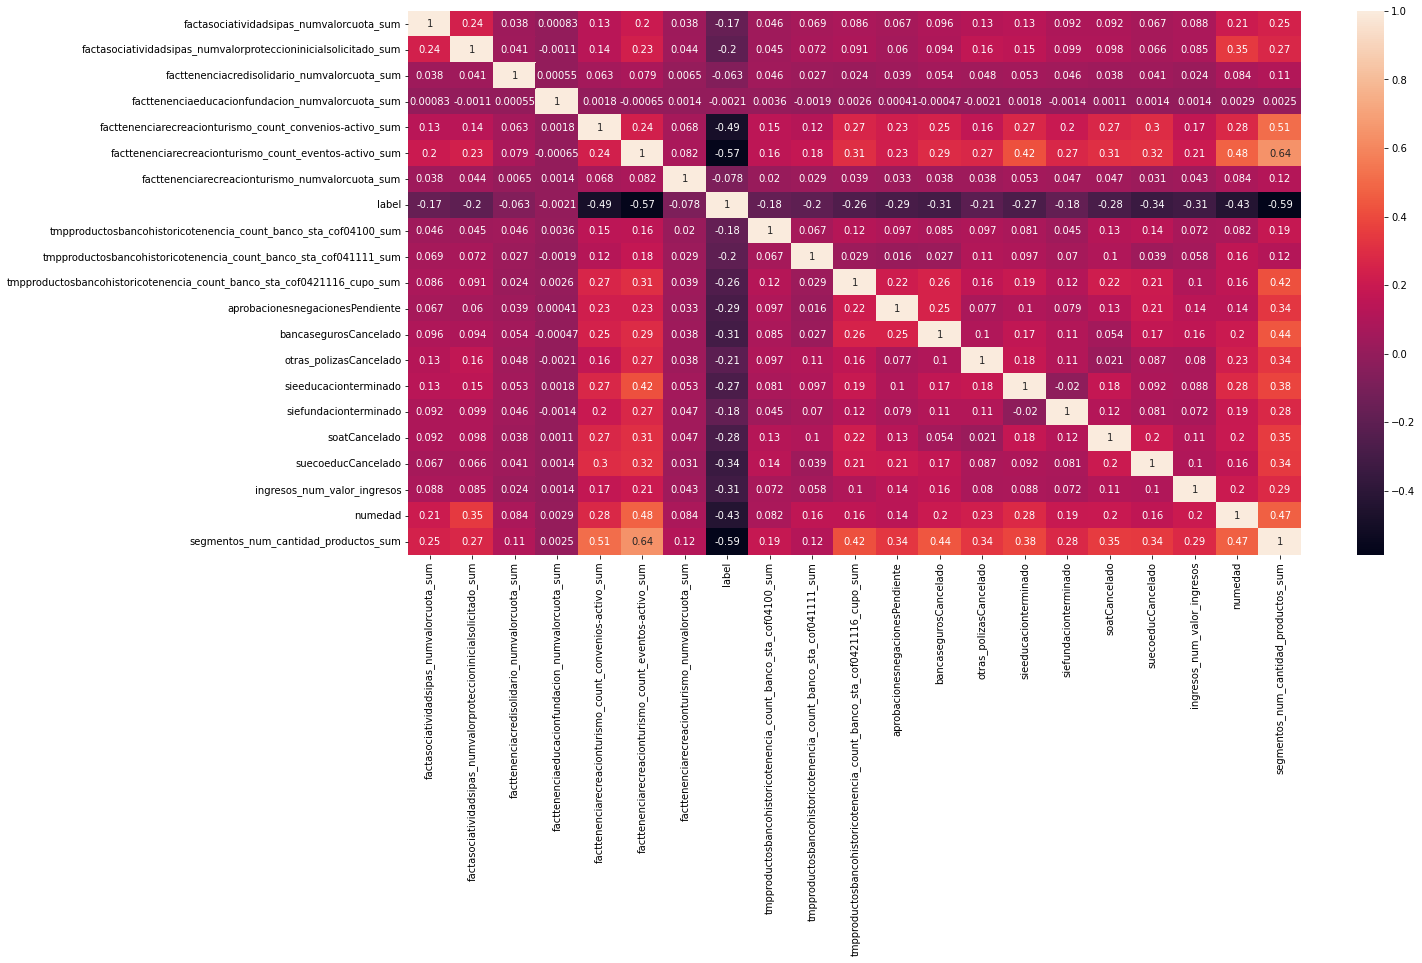

In [ ]:

plt.figure(figsize=(20,10)) 
sns.heatmap(corr, annot=True) 

In [ ]:
data_numerica.describe()

,factasociatividadsipas_numvalorcuota_sum,factasociatividadsipas_numvalorproteccioninicialsolicitado_sum,facttenenciacredisolidario_numvalorcuota_sum,facttenenciaeducacionfundacion_numvalorcuota_sum,facttenenciarecreacionturismo_count_convenios-activo_sum,facttenenciarecreacionturismo_count_eventos-activo_sum,facttenenciarecreacionturismo_numvalorcuota_sum,label,tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum,...,aprobacionesnegacionesPendiente,bancasegurosCancelado,otras_polizasCancelado,sieeducacionterminado,siefundacionterminado,soatCancelado,suecoeducCancelado,ingresos_num_valor_ingresos,numedad,segmentos_num_cantidad_productos_sum
count,4.116000e+05,4.116000e+05,4.116000e+05,4.116000e+05,411600.000000,411600.000000,4.116000e+05,411600.000000,411600.000000,411600.000000,...,411600.000000,411600.000000,411600.00000,411600.000000,411600.000000,411600.000000,411600.000000,4.116000e+05,411600.000000,411600.000000
mean,3.288562e+05,6.525886e+07,5.163308e+04,5.831607e+05,8.530923,19.806419,1.647598e+06,0.550160,2.080428,3.162225,...,2.982804,1.921212,7.64139,16.916460,5.921183,4.048768,4.318756,2.639015e+06,41.796397,170.120986
std,1.224677e+06,2.824066e+08,7.008400e+05,3.189388e+08,15.567148,27.964886,1.701532e+07,0.497478,7.237501,11.450365,...,9.332765,6.227796,21.71568,33.408998,20.687414,12.428718,11.362990,6.731105e+06,14.072897,255.949145
min,-7.625083e+06,-3.731394e+09,-9.200000e+01,-1.438814e+11,0.000000,0.000000,-1.962492e+08,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7.330000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,30.000000,0.000000
50%,8.989500e+04,4.334400e+06,0.000000e+00,0.000000e+00,0.000000,2.000000,0.000000e+00,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.162271e+06,39.000000,31.000000
75%,3.911305e+05,2.520018e+07,0.000000e+00,0.000000e+00,12.000000,35.000000,2.400000e+05,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,16.000000,0.000000,0.000000,0.000000,4.069704e+06,52.000000,260.000000
max,2.029992e+08,9.664354e+09,4.962876e+07,1.890000e+10,103.000000,117.000000,1.964059e+09,1.000000,92.000000,92.000000,...,48.000000,40.000000,144.00000,156.000000,156.000000,132.000000,57.000000,1.600000e+09,104.000000,1988.000000


In [ ]:
data_numerica.columns

Index(['factasociatividadsipas_numvalorcuota_sum',
       'factasociatividadsipas_numvalorproteccioninicialsolicitado_sum',
       'facttenenciacredisolidario_numvalorcuota_sum',
       'facttenenciaeducacionfundacion_numvalorcuota_sum',
       'facttenenciarecreacionturismo_count_convenios-activo_sum',
       'facttenenciarecreacionturismo_count_eventos-activo_sum',
       'facttenenciarecreacionturismo_numvalorcuota_sum', 'label',
       'tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum',
       'tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum',
       'tmpproductosbancohistoricotenencia_count_banco_sta_cof0421116_cupo_sum',
       'aprobacionesnegacionesPendiente', 'bancasegurosCancelado',
       'otras_polizasCancelado', 'sieeducacionterminado',
       'siefundacionterminado', 'soatCancelado', 'suecoeducCancelado',
       'ingresos_num_valor_ingresos', 'numedad',
       'segmentos_num_cantidad_productos_sum'],
      dtype='object')

In [ ]:
data_numerica.dtypes

factasociatividadsipas_numvalorcuota_sum                                  float64
factasociatividadsipas_numvalorproteccioninicialsolicitado_sum            float64
facttenenciacredisolidario_numvalorcuota_sum                              float64
facttenenciaeducacionfundacion_numvalorcuota_sum                          float64
facttenenciarecreacionturismo_count_convenios-activo_sum                  float64
facttenenciarecreacionturismo_count_eventos-activo_sum                    float64
facttenenciarecreacionturismo_numvalorcuota_sum                           float64
label                                                                       int64
tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum           float64
tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum          float64
tmpproductosbancohistoricotenencia_count_banco_sta_cof0421116_cupo_sum    float64
aprobacionesnegacionesPendiente                                           float64
bancasegurosCanc

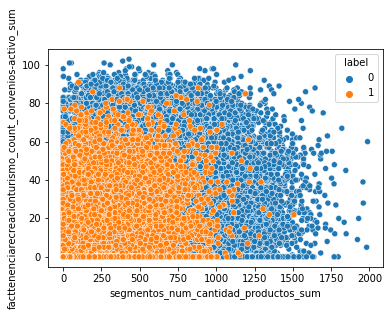

In [ ]:
sns.scatterplot(x = 'segmentos_num_cantidad_productos_sum', y =  'facttenenciarecreacionturismo_count_convenios-activo_sum', hue = 'label', data = data_numerica)

# Scale features

In [ ]:
x_numeric = data_numerica.drop(['label'],axis=1)

In [ ]:
y = data_numerica['label']


In [ ]:
data_categorica.dtypes

segmento_ciclo_vida    object
unicocorte             object
actividad_laboral      object
area_conocimientos     object
estado_civil           object
estrato                object
nivel_academico        object
tipo_vivienda          object
dtype: object

In [ ]:
data_categorica_dummi = pd.get_dummies(data_categorica)


In [ ]:
cat_columns = data_categorica.select_dtypes(['object']).columns
data_scale_categorica  = data_categorica[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [ ]:
data_categorica_dummi.head()

,segmento_ciclo_vida_consolidacion,segmento_ciclo_vida_en_formacion,segmento_ciclo_vida_joven_asociado,segmento_ciclo_vida_maduro,segmento_ciclo_vida_mujer_independiente,segmento_ciclo_vida_sin_segmento,segmento_ciclo_vida_transicion,unicocorte_05_del_mes,unicocorte_10_del_mes,unicocorte_15_del_mes,...,nivel_academico_especializacion,nivel_academico_ninguno,nivel_academico_primaria,nivel_academico_profesional,nivel_academico_tecnico,nivel_academico_tecnologo,tipo_vivienda_alquiler,tipo_vivienda_desconocida,tipo_vivienda_familiar,tipo_vivienda_propia
nkCliente,,,,,,,,,,,,,,,,,,,,,
CC40041526,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
CC40041883,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
CC40043537,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
CC40046612,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
CC40048857,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
data_scale_categorica.head()

,segmento_ciclo_vida,unicocorte,actividad_laboral,area_conocimientos,estado_civil,estrato,nivel_academico,tipo_vivienda
nkCliente,,,,,,,,
CC40041526,0,0,0,0,0,0,0,0
CC40041883,0,1,1,1,1,0,0,1
CC40043537,0,2,1,2,1,1,0,1
CC40046612,0,2,0,2,0,2,1,1
CC40048857,0,2,0,3,0,3,0,1


In [ ]:
min_train = x_numeric.min()

range_train = (x_numeric - min_train).max()


X_scaled = (x_numeric - min_train)/range_train

In [ ]:
X_scaled.head()

,factasociatividadsipas_numvalorcuota_sum,factasociatividadsipas_numvalorproteccioninicialsolicitado_sum,facttenenciacredisolidario_numvalorcuota_sum,facttenenciaeducacionfundacion_numvalorcuota_sum,facttenenciarecreacionturismo_count_convenios-activo_sum,facttenenciarecreacionturismo_count_eventos-activo_sum,facttenenciarecreacionturismo_numvalorcuota_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof0421116_cupo_sum,aprobacionesnegacionesPendiente,bancasegurosCancelado,otras_polizasCancelado,sieeducacionterminado,siefundacionterminado,soatCancelado,suecoeducCancelado,ingresos_num_valor_ingresos,numedad,segmentos_num_cantidad_productos_sum
nkCliente,,,,,,,,,,,,,,,,,,,,
CC40041526,0.038318,0.280477,0.000002,0.883896,0.252427,0.529915,0.093208,0.000000,0.000000,0.000000,0.000000,0.10,0.020833,0.237179,0.000000,0.000000,0.982456,0.004624,0.432692,0.311368
CC40041883,0.040445,0.280029,0.000002,0.883895,0.203883,0.000000,0.091458,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.385965,0.000695,0.413462,0.018109
CC40043537,0.042604,0.280994,0.000002,0.883893,0.427184,0.000000,0.091893,0.021739,0.054348,0.341772,0.979167,0.75,0.027778,0.993590,0.000000,0.000000,0.000000,0.001360,0.413462,0.346579
CC40046612,0.039730,0.287519,0.000002,0.883895,0.213592,0.529915,0.091870,0.000000,0.021739,0.746835,0.812500,0.40,0.000000,0.403846,0.108974,0.098485,0.649123,0.005559,0.394231,0.351107
CC40048857,0.037160,0.279429,0.000002,0.883893,0.252427,0.461538,0.090947,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.538462,0.000000,0.000000,0.000000,0.000000,0.375000,0.119215


In [ ]:
datos_model = pd.merge(X_scaled,data_categorica_dummi, left_index=True, right_index=True)
datos_model = pd.merge(datos_model,y, left_index=True, right_index=True)
datos_model_original = pd.merge(x_numeric,data_categorica_dummi, left_index=True, right_index=True)
datos_model_original = pd.merge(datos_model_original,y, left_index=True, right_index=True)


In [ ]:

datos_model_categori_numeric = pd.merge(X_scaled,data_scale_categorica, left_index=True, right_index=True)
datos_model_categori_numeric = pd.merge(datos_model_categori_numeric,y, left_index=True, right_index=True)
datos_model_original_normal = pd.merge(x_numeric,data_categorica, left_index=True, right_index=True)
datos_model_original_normal = pd.merge(datos_model_original_normal,y, left_index=True, right_index=True)

In [ ]:
datos_model_categori_numeric.to_csv("/content/drive/MyDrive/Tesis/datos_model_categori_numeric.csv")

datos_model_original_normal.to_csv("/content/drive/MyDrive/Tesis/datos_model_original_normal.csv")

In [ ]:
datos_model.to_csv("/content/drive/MyDrive/Tesis/datos_model.csv")

datos_model_original.to_csv("/content/drive/MyDrive/Tesis/datos_model_original.csv")

# Training Models

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
#from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
# cuando se vuelva a iterar 
from thundersvm import SVC
#from sklearn.svm import SVC 
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
# cuando se vuelva a iterar from thundersvm import SVC
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Partición de datos (80% Entrenamiento - 20% prueba)

In [ ]:
## Lectura de datos scalados y datos originales

datos_model = pd.read_csv('/content/drive/MyDrive/Tesis/datos_model.csv')

datos_model_original = pd.read_csv('/content/drive/MyDrive/Tesis/datos_model_original.csv')

datos_model_categori_numeric = pd.read_csv('/content/drive/MyDrive/Tesis/datos_model_categori_numeric.csv')


In [ ]:
datos_model.shape
#datos_model_original.shape


(411600, 80)

In [ ]:
datos_model_categori_numeric.shape

(411600, 30)

In [ ]:
datos_model_categori_numeric.head()

,nkCliente,factasociatividadsipas_numvalorcuota_sum,factasociatividadsipas_numvalorproteccioninicialsolicitado_sum,facttenenciacredisolidario_numvalorcuota_sum,facttenenciaeducacionfundacion_numvalorcuota_sum,facttenenciarecreacionturismo_count_convenios-activo_sum,facttenenciarecreacionturismo_count_eventos-activo_sum,facttenenciarecreacionturismo_numvalorcuota_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof04100_sum,tmpproductosbancohistoricotenencia_count_banco_sta_cof041111_sum,...,segmentos_num_cantidad_productos_sum,segmento_ciclo_vida,unicocorte,actividad_laboral,area_conocimientos,estado_civil,estrato,nivel_academico,tipo_vivienda,label
0,CC40041526,0.038318,0.280477,0.000002,0.883896,0.252427,0.529915,0.093208,0.000000,0.000000,...,0.311368,0,0,0,0,0,0,0,0,0
1,CC40041883,0.040445,0.280029,0.000002,0.883895,0.203883,0.000000,0.091458,0.000000,0.000000,...,0.018109,0,1,1,1,1,0,0,1,0
2,CC40043537,0.042604,0.280994,0.000002,0.883893,0.427184,0.000000,0.091893,0.021739,0.054348,...,0.346579,0,2,1,2,1,1,0,1,0
3,CC40046612,0.039730,0.287519,0.000002,0.883895,0.213592,0.529915,0.091870,0.000000,0.021739,...,0.351107,0,2,0,2,0,2,1,1,0
4,CC40048857,0.037160,0.279429,0.000002,0.883893,0.252427,0.461538,0.090947,0.000000,0.000000,...,0.119215,0,2,0,3,0,3,0,1,0


In [ ]:
datos_model.set_index('nkCliente', inplace=True)
datos_model_original.set_index('nkCliente', inplace=True)
datos_model_categori_numeric.set_index('nkCliente', inplace=True)


In [ ]:
X_scale = datos_model.drop('label', axis='columns')
y_scale = datos_model['label']

In [ ]:
X_original = datos_model_original.drop('label', axis='columns')
y_original = datos_model_original['label']

In [ ]:
X_original_categori_numeric = datos_model_categori_numeric.drop('label', axis='columns')
y_original_categori_numeric = datos_model_categori_numeric['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size = 0.20, random_state=5)

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y_scale, test_size = 0.20, random_state=5)

In [ ]:
X_train_cat_numeric, X_test_cat_numeric, y_train_cat_numeric, y_test_cat_numeric = train_test_split(X_original_categori_numeric, y_original_categori_numeric, test_size = 0.20, random_state=5)



In [ ]:
Data_test_categori_numeric = pd.merge(X_test_cat_numeric,y_test_cat_numeric, left_index=True, right_index=True)
Data_training_categori_numeric = pd.merge(X_train_cat_numeric,y_train_cat_numeric, left_index=True, right_index=True)

In [ ]:
Data_test_categori_numeric.to_csv("/content/drive/MyDrive/Tesis/Data_sets/Data_test_categori_numeric.csv")
Data_training_categori_numeric.to_csv("/content/drive/MyDrive/Tesis/Data_sets/Data_training_categori_numeric.csv")

In [ ]:
Data_test = pd.merge(X_test_scale,y_test_scale, left_index=True, right_index=True)
Data_trainint = pd.merge(X_train_scale,y_train_scale, left_index=True, right_index=True)

In [ ]:
Data_test.to_csv("/content/drive/MyDrive/Tesis/Data_sets/Data_test_v1.csv")
Data_trainint.to_csv("/content/drive/MyDrive/Tesis/Data_sets/Data_trainint_v1.csv")

# SVM

In [13]:
datos_prueba = pd.read_csv('/content/drive/MyDrive/Tesis/Data_sets/Data_test_categori_numeric.csv')


In [14]:
datos_entrenamiento = pd.read_csv('/content/drive/MyDrive/Tesis/Data_sets/Data_training_categori_numeric.csv')


In [15]:
datos_prueba.set_index('nkCliente', inplace=True)
datos_entrenamiento.set_index('nkCliente', inplace=True)

In [16]:
X_training = datos_entrenamiento.drop('label', axis='columns')
y_training = datos_entrenamiento['label']

In [17]:
X_test = datos_prueba.drop('label', axis='columns')
y_test = datos_prueba['label']

In [18]:
X_test.shape

(82320, 28)

In [ ]:
svc_model = SVC()
svc_model.fit(X_training, y_training)

SVC(class_weight={})

In [ ]:
svc_model.get_params()

{'C': 1.0,
 'cache_size': None,
 'class_weight': {},
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'auto',
 'gpu_id': 0,
 'kernel': 'rbf',
 'max_iter': -1,
 'max_mem_size': -1,
 'n_jobs': -1,
 'probability': False,
 'random_state': None,
 'shrinking': False,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Fit the model to training data
#svc_model.fit(X_train_scale, y_train_scale)



In [ ]:
# Check test set accuracy
accuracy = svc_model.score(X_test, y_test)

print('Accuracy: {}'.format(accuracy))

Accuracy: 0.8723153547133139


In [ ]:
y_predict_svc = svc_model.predict(X_test)
cm_svc_normal = confusion_matrix(y_test, y_predict_svc)

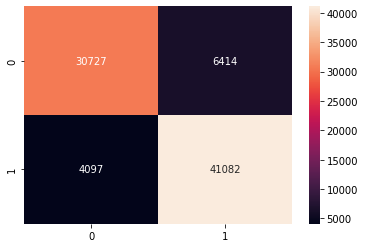

In [ ]:
sns.heatmap(cm_svc_normal,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85     37141
           1       0.86      0.91      0.89     45179

    accuracy                           0.87     82320
   macro avg       0.87      0.87      0.87     82320
weighted avg       0.87      0.87      0.87     82320



In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_predict_svc))
print('Recall: %.3f' % recall_score(y_test, y_predict_svc))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict_svc))
print('F1 Score: %.3f' % f1_score(y_test, y_predict_svc))

Precision: 0.865
Recall: 0.909
Accuracy: 0.872
F1 Score: 0.887


 ## SVM Grilla

In [19]:
param_grid = {'C': [50,500,1000], 'kernel': ['rbf','polynomial', 'sigmoid']} 
#param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf','linear']} 

In [20]:
from sklearn.model_selection import GridSearchCV


In [21]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4,cv=5)

In [22]:
grid.fit(X_training, y_training)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................C=50, kernel=rbf;, score=0.893 total time= 1.0min
[CV 2/5] END ..................C=50, kernel=rbf;, score=0.893 total time= 1.0min
[CV 3/5] END ..................C=50, kernel=rbf;, score=0.894 total time= 1.0min
[CV 4/5] END ..................C=50, kernel=rbf;, score=0.893 total time= 1.0min
[CV 5/5] END ..................C=50, kernel=rbf;, score=0.894 total time= 1.1min
[CV 1/5] END ...........C=50, kernel=polynomial;, score=0.889 total time= 3.2min
[CV 2/5] END ...........C=50, kernel=polynomial;, score=0.890 total time= 3.1min
[CV 3/5] END ...........C=50, kernel=polynomial;, score=0.890 total time= 3.3min
[CV 4/5] END ...........C=50, kernel=polynomial;, score=0.889 total time= 3.1min
[CV 5/5] END ...........C=50, kernel=polynomial;, score=0.890 total time= 3.2min
[CV 1/5] END ..............C=50, kernel=sigmoid;, score=0.550 total time=  25.3s
[CV 2/5] END ..............C=50, kernel=sigmoid;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [50, 500, 1000],
                         'kernel': ['rbf', 'polynomial', 'sigmoid']},
             verbose=4)

In [23]:

grid.best_params_

{'C': 1000, 'kernel': 'rbf'}

In [24]:
grid.best_estimator_

SVC(C=1000, class_weight={})

In [25]:
grid_predictions = grid.predict(X_test)

In [26]:
grid_predictions

array([1., 1., 0., ..., 1., 1., 0.], dtype=float32)

In [27]:
model_svc = confusion_matrix(y_test, grid_predictions)

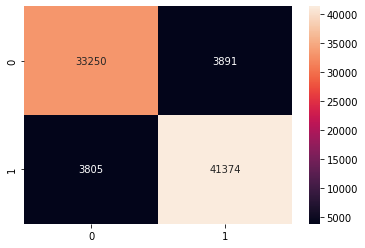

In [28]:
sns.heatmap(model_svc, annot=True, fmt="d")

In [29]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     37141
           1       0.91      0.92      0.91     45179

    accuracy                           0.91     82320
   macro avg       0.91      0.91      0.91     82320
weighted avg       0.91      0.91      0.91     82320



In [30]:
print('Precision: %.3f' % precision_score(y_test,grid_predictions))
print('Recall: %.3f' % recall_score(y_test,grid_predictions))
print('Accuracy: %.3f' % accuracy_score(y_test,grid_predictions))
print('F1 Score: %.3f' % f1_score(y_test,grid_predictions))

Precision: 0.914
Recall: 0.916
Accuracy: 0.907
F1 Score: 0.915


# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree
## KEEPOUTPUT
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_training, y_training)

RandomForestClassifier()

In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
accuracy = rf_model.score(X_test, y_test)

In [ ]:
y_predict_rf = rf_model.predict(X_test)


In [ ]:
y_predict_rf

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
cm_rf_normal = confusion_matrix(y_test, y_predict_rf)

In [ ]:
cm_rf_normal

array([[36091,  1050],
       [ 1804, 43375]])

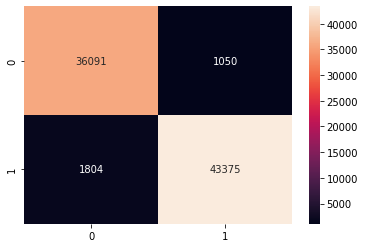

In [ ]:
sns.heatmap(cm_rf_normal, annot=True, fmt="d")

In [ ]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     37141
           1       0.98      0.96      0.97     45179

    accuracy                           0.97     82320
   macro avg       0.96      0.97      0.97     82320
weighted avg       0.97      0.97      0.97     82320



In [ ]:
print('Precision: %.3f' % precision_score(y_test,y_predict_rf))
print('Recall: %.3f' % recall_score(y_test,y_predict_rf))
print('Accuracy: %.3f' % accuracy_score(y_test,y_predict_rf))
print('F1 Score: %.3f' % f1_score(y_test,y_predict_rf))



Precision: 0.976
Recall: 0.960
Accuracy: 0.965
F1 Score: 0.968


In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt





In [ ]:
perm_importance = permutation_importance(rf_model, X_test, y_test)

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()


Text(0.5, 0, 'Permutation Importance')

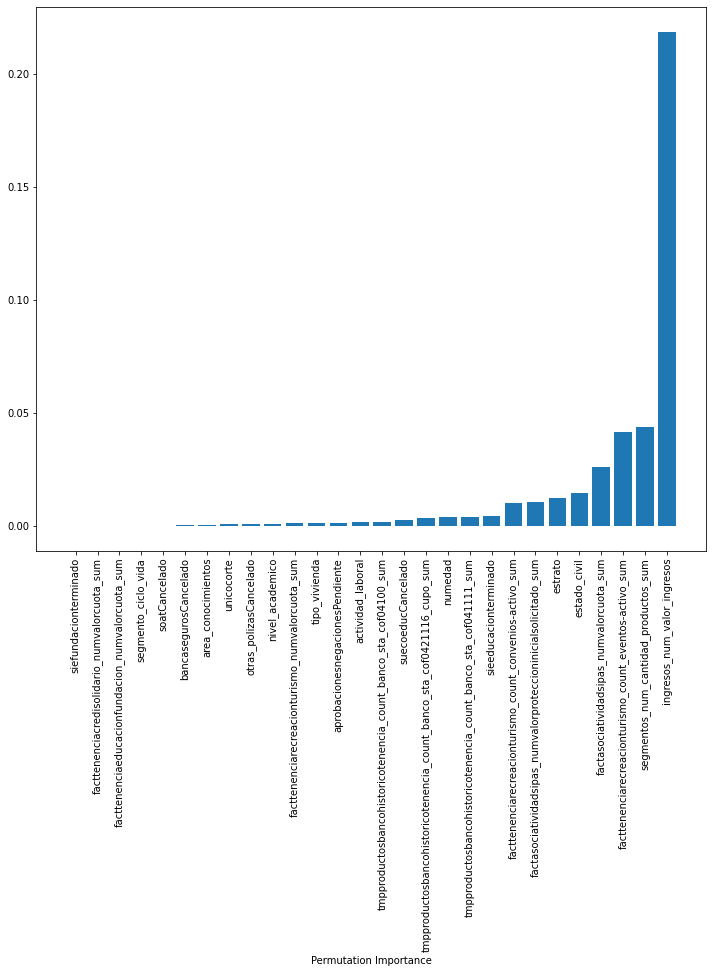

In [ ]:
# Create figure
        
fig = plt.figure() 

# Figure size

fig.set_size_inches(12,10)

plt.xticks(rotation=90)
plt.bar(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,40,50,60],
    'criterion' :['gini', 'entropy']
}

In [ ]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_training, y_training)

In [ ]:
CV_rfc.best_params_

In [ ]:
grid_predictions = CV_rfc.predict(X_test)

In [ ]:
grid_predictions

In [ ]:
model_rfc_grid = confusion_matrix(y_test, grid_predictions)

In [ ]:
sns.heatmap(model_rfc_grid, annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,grid_predictions))

In [ ]:
print('Precision: %.3f' % precision_score(y_test,grid_predictions))
print('Recall: %.3f' % recall_score(y_test,grid_predictions))
print('Accuracy: %.3f' % accuracy_score(y_test,grid_predictions))
print('F1 Score: %.3f' % f1_score(y_test,grid_predictions))

In [ ]:
# The full pipeline as a step in another pipeline with an
# estimator as the final step.
pipe = Pipeline(
   steps = [("clf",RandomForestClassifier())])

In [ ]:
# Creating a dictionary with the hyperparameters.
search_space = [
     {"clf": [RandomForestClassifier()],
      "clf__n_estimators": [900, 1500],
      "clf__criterion": ["gini", "entropy"],
 #     "clf__max_leaf_nodes": [300, 350, 400],
      "clf__oob_score": [True]}]

In [ ]:
# Defining StratifiedKFold object -> 10-StratifiedFolds
#kfold = StratifiedKFold(n_splits=num_folds,
#                        random_state=seed, shuffle=True)
# Creating the GridSearchCV object.
grid = GridSearchCV(estimator=pipe, 
                    param_grid=search_space,
                    cv=5,
                    #scoring=scoring,  # Accuracy
                    return_train_score=True,
                    n_jobs=-1,
                    #refit="AUC",  # AUC == ROC
                    #verbose=10
                    )  # progress bar
# Fitting the GridSearchCV object.
best_model = grid.fit(X_training, y_training)

In [ ]:
best_model

In [ ]:
best_model

In [ ]:
best_model.best_params_

In [ ]:
best_model.best_params_

In [ ]:
grid_predictions = best_model.predict(X_test)

In [ ]:
model_rfc_grid = confusion_matrix(y_test, grid_predictions)

In [ ]:
sns.heatmap(model_rfc_grid, annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,grid_predictions))

In [ ]:
print('Precision: %.3f' % precision_score(y_test,grid_predictions))
print('Recall: %.3f' % recall_score(y_test,grid_predictions))
print('Accuracy: %.3f' % accuracy_score(y_test,grid_predictions))
print('F1 Score: %.3f' % f1_score(y_test,grid_predictions))

# XGBOOST


In [ ]:
#!pip install -q --upgrade ipython
#!pip install -q --upgrade ipykernel
#!pip uninstall xgboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier

In [ ]:
  model = XGBClassifier(tree_method="gpu_hist")
            
            
   

In [ ]:
model.fit(X_training, y_training)
        

    


In [ ]:
y_pred=model.predict(X_test)


In [ ]:
model_boost = confusion_matrix(y_test, y_pred)

In [ ]:
model.get_params()

In [ ]:
sns.heatmap(model_boost, annot=True, fmt="d")

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test,y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))
print('F1 Score: %.3f' % f1_score(y_test,y_pred))

In [ ]:
# The full pipeline as a step in another pipeline
# with an estimator as the final step.
pipe = Pipeline(steps = [("clf", XGBClassifier())])


In [ ]:
# Creating a dictionary with the hyperparameters.
search_space = [
     {"clf": [XGBClassifier()],
      "clf__n_estimators": [100,200],
      "clf__max_depth": [30,50]
      #"clf__learning_rate": [0.1,0.2,0.4],
      #"clf__subsample": [1,0.7],
      #"clf__colsample_bytree": [5,],
      #"clf__tree_method": ["gpu_hist"]
      }  # For using the GPU.
]


# Creating the GridSearchCV object.
grid = GridSearchCV(estimator=pipe, 
                    param_grid=search_space,
                    cv=5,
                   # scoring=scoring,  # Accuracy
                    return_train_score=True,
                    verbose=1
                   # n_jobs=-1,
                    #refit="AUC"
                    )  # AUC == ROC


In [ ]:
# Getting the time start.
##tmp = time.time()
# Fitting the GridSearchCV object.
#best_model = grid.fit(X_train, y_train)
best_model_boosts = grid.fit(X_training, y_training)
# Printing the time spent.
#print("CPU Training Time: %s seconds" % (str(time.time() - tmp)))
#print("GPU Training Time: %s seconds" % (str(time.time() - tmp)))

In [ ]:
best_model_boosts.best_params_

In [ ]:
grid_predictions_boost = best_model_boosts.predict(X_test)

In [ ]:
model_boost_grid = confusion_matrix(y_test, grid_predictions_boost)

In [ ]:
sns.heatmap(model_boost_grid, annot=True, fmt="d")

In [ ]:
print(classification_report(y_test,grid_predictions_boost))

In [ ]:
print('Precision: %.3f' % precision_score(y_test,grid_predictions_boost))
print('Recall: %.3f' % recall_score(y_test,grid_predictions_boost))
print('Accuracy: %.3f' % accuracy_score(y_test,grid_predictions_boost))
print('F1 Score: %.3f' % f1_score(y_test,grid_predictions_boost))

# redes neuronales

In [ ]:
# Cómo importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Parte 2 - Construir la RNA

# Importar Keras y librerías adicionales
import keras
from keras.models import Sequential
from keras.layers import Dense
# import tensorflow
import tensorflow as tf
#import keras 
from tensorflow import keras


# Inicializar la RNA
classifier = Sequential()

# Añadir las capas de entrada y primera capa oculta
classifier.add(Dense(units = 14, kernel_initializer = "uniform",  
                     activation = "relu", input_dim = 28))

# Añadir la segunda capa oculta
classifier.add(Dense(units = 7, kernel_initializer = "uniform",  activation = "relu"))

# Añadir la capa de salida
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

# Compilar la RNA
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model = keras.Sequential([
    # input layer
    keras.layers.Dense(14, input_shape=(28,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(3,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)



In [ ]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(X_training, y_training,batch_size = 10, epochs = 100)

Epoch 1/100
32928/32928 [==============================] - 75s 2ms/step - loss: 0.3180 - accuracy: 0.8705
Epoch 2/100
32928/32928 [==============================] - 72s 2ms/step - loss: 0.2644 - accuracy: 0.8915
Epoch 3/100
32928/32928 [==============================] - 72s 2ms/step - loss: 0.2341 - accuracy: 0.9016
Epoch 4/100
32928/32928 [==============================] - 71s 2ms/step - loss: 0.2215 - accuracy: 0.9067
Epoch 5/100
32928/32928 [==============================] - 72s 2ms/step - loss: 0.2107 - accuracy: 0.9115
Epoch 6/100
32928/32928 [==============================] - 71s 2ms/step - loss: 0.2000 - accuracy: 0.9152
Epoch 7/100
32928/32928 [==============================] - 71s 2ms/step - loss: 0.1879 - accuracy: 0.9207
Epoch 8/100
32928/32928 [==============================] - 71s 2ms/step - loss: 0.1775 - accuracy: 0.9251
Epoch 9/100
32928/32928 [==============================] - 71s 2ms/step - loss: 0.1706 - accuracy: 0.9279
Epoch 10/100
32928/32928 [====================

In [ ]:
# Ajustamos la RNA al Conjunto de Entrenamiento
classifier.fit(X_training, y_training,  batch_size = 10, epochs = 100)


Epoch 1/100
32928/32928 [==============================] - 65s 2ms/step - loss: 0.2863 - accuracy: 0.8784
Epoch 2/100
32928/32928 [==============================] - 64s 2ms/step - loss: 0.2375 - accuracy: 0.8994
Epoch 3/100
32928/32928 [==============================] - 64s 2ms/step - loss: 0.2233 - accuracy: 0.9059
Epoch 4/100
32928/32928 [==============================] - 64s 2ms/step - loss: 0.2105 - accuracy: 0.9107
Epoch 5/100
32928/32928 [==============================] - 65s 2ms/step - loss: 0.1963 - accuracy: 0.9164
Epoch 6/100
32928/32928 [==============================] - 65s 2ms/step - loss: 0.1840 - accuracy: 0.9212
Epoch 7/100
32928/32928 [==============================] - 65s 2ms/step - loss: 0.1747 - accuracy: 0.9253
Epoch 8/100
32928/32928 [==============================] - 65s 2ms/step - loss: 0.1689 - accuracy: 0.9279
Epoch 9/100
32928/32928 [==============================] - 65s 2ms/step - loss: 0.1641 - accuracy: 0.9303
Epoch 10/100
32928/32928 [====================

In [ ]:
# Predicción de los resultados con el Conjunto de Testing
y_pred_r1  = classifier.predict(X_test)
y_pred_r2  = model.predict(X_test)

In [ ]:


y_pred_r1 = (y_pred_r1>0.5)
y_pred_r1

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:

y_pred_r2 = (y_pred_r2>0.5)
y_pred_r2

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_r1)
print((cm[0][0]+cm[1][1])/cm.sum())

0.9425655976676385


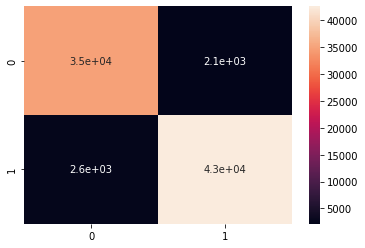

In [ ]:
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
print(classification_report(y_test,y_pred_r1))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     37141
           1       0.95      0.94      0.95     45179

    accuracy                           0.94     82320
   macro avg       0.94      0.94      0.94     82320
weighted avg       0.94      0.94      0.94     82320



In [ ]:
print('Precision: %.3f' % precision_score(y_test,y_pred_r1))
print('Recall: %.3f' % recall_score(y_test,y_pred_r1))
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred_r1))
print('F1 Score: %.3f' % f1_score(y_test,y_pred_r1))

In [ ]:
cm_2 = confusion_matrix(y_test, y_pred_r2)
print((cm_2[0][0]+cm_2[1][1])/cm_2.sum())


0.9422619047619047


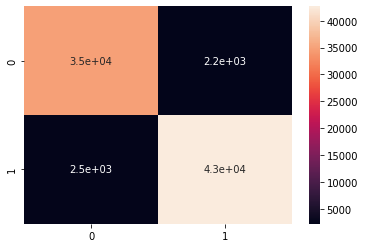

In [ ]:
sns.heatmap(cm_2, annot=True, fmt="d")

In [ ]:
print(classification_report(y_test,y_pred_r2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     37141
           1       0.95      0.94      0.95     45179

    accuracy                           0.94     82320
   macro avg       0.94      0.94      0.94     82320
weighted avg       0.94      0.94      0.94     82320



In [ ]:
print('Precision: %.3f' % precision_score(y_test,y_pred_r2))
print('Recall: %.3f' % recall_score(y_test,y_pred_r2))
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred_r2))
print('F1 Score: %.3f' % f1_score(y_test,y_pred_r2))